In [1]:
import os, sys

sys.path.insert(0, os.path.abspath('..'))
os.environ['USE_PYGEOS'] = '0'

%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from shapely.geometry import shape
from shapely.geometry import Polygon
import uuid
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from shapely.ops import unary_union

In [3]:
master_dir = "/data/sand_mining"

In [4]:
india_rivers = gpd.read_file(f"{master_dir}/rivers/streamflow/India_streams.geojson")

india_osm  = gpd.read_file(f"{master_dir}/rivers/india-rivers_multipolygons.geojson")


In [99]:
# india_osm_all = unary_union(india_osm.geometry)
# india_osm_all = gpd.GeoDataFrame(geometry=[india_osm_all], crs=india_osm.crs).explode()
# india_osm_all.cx[73.1:74.1, 21.70:21.90]
# # india_osm_all[india_osm['osm_id'] == "4045"].clip(india_rivers[:1])

In [5]:
big_join = gpd.sjoin(india_osm, india_rivers, how = 'inner', predicate = 'intersects')

In [92]:
india_osm.shape, india_rivers.shape

((13485, 111), (9579, 9))

In [95]:
big_join

,osm_id,seg_id
0,4045,7920
100,1993017,7920
341,3031475,7920
1090,9050989,7920
1629,19758036,7920
...,...,...
13404,1182447276,8042
13408,1189350773,3552
13451,1201702919,2359
13451,1201702919,2360


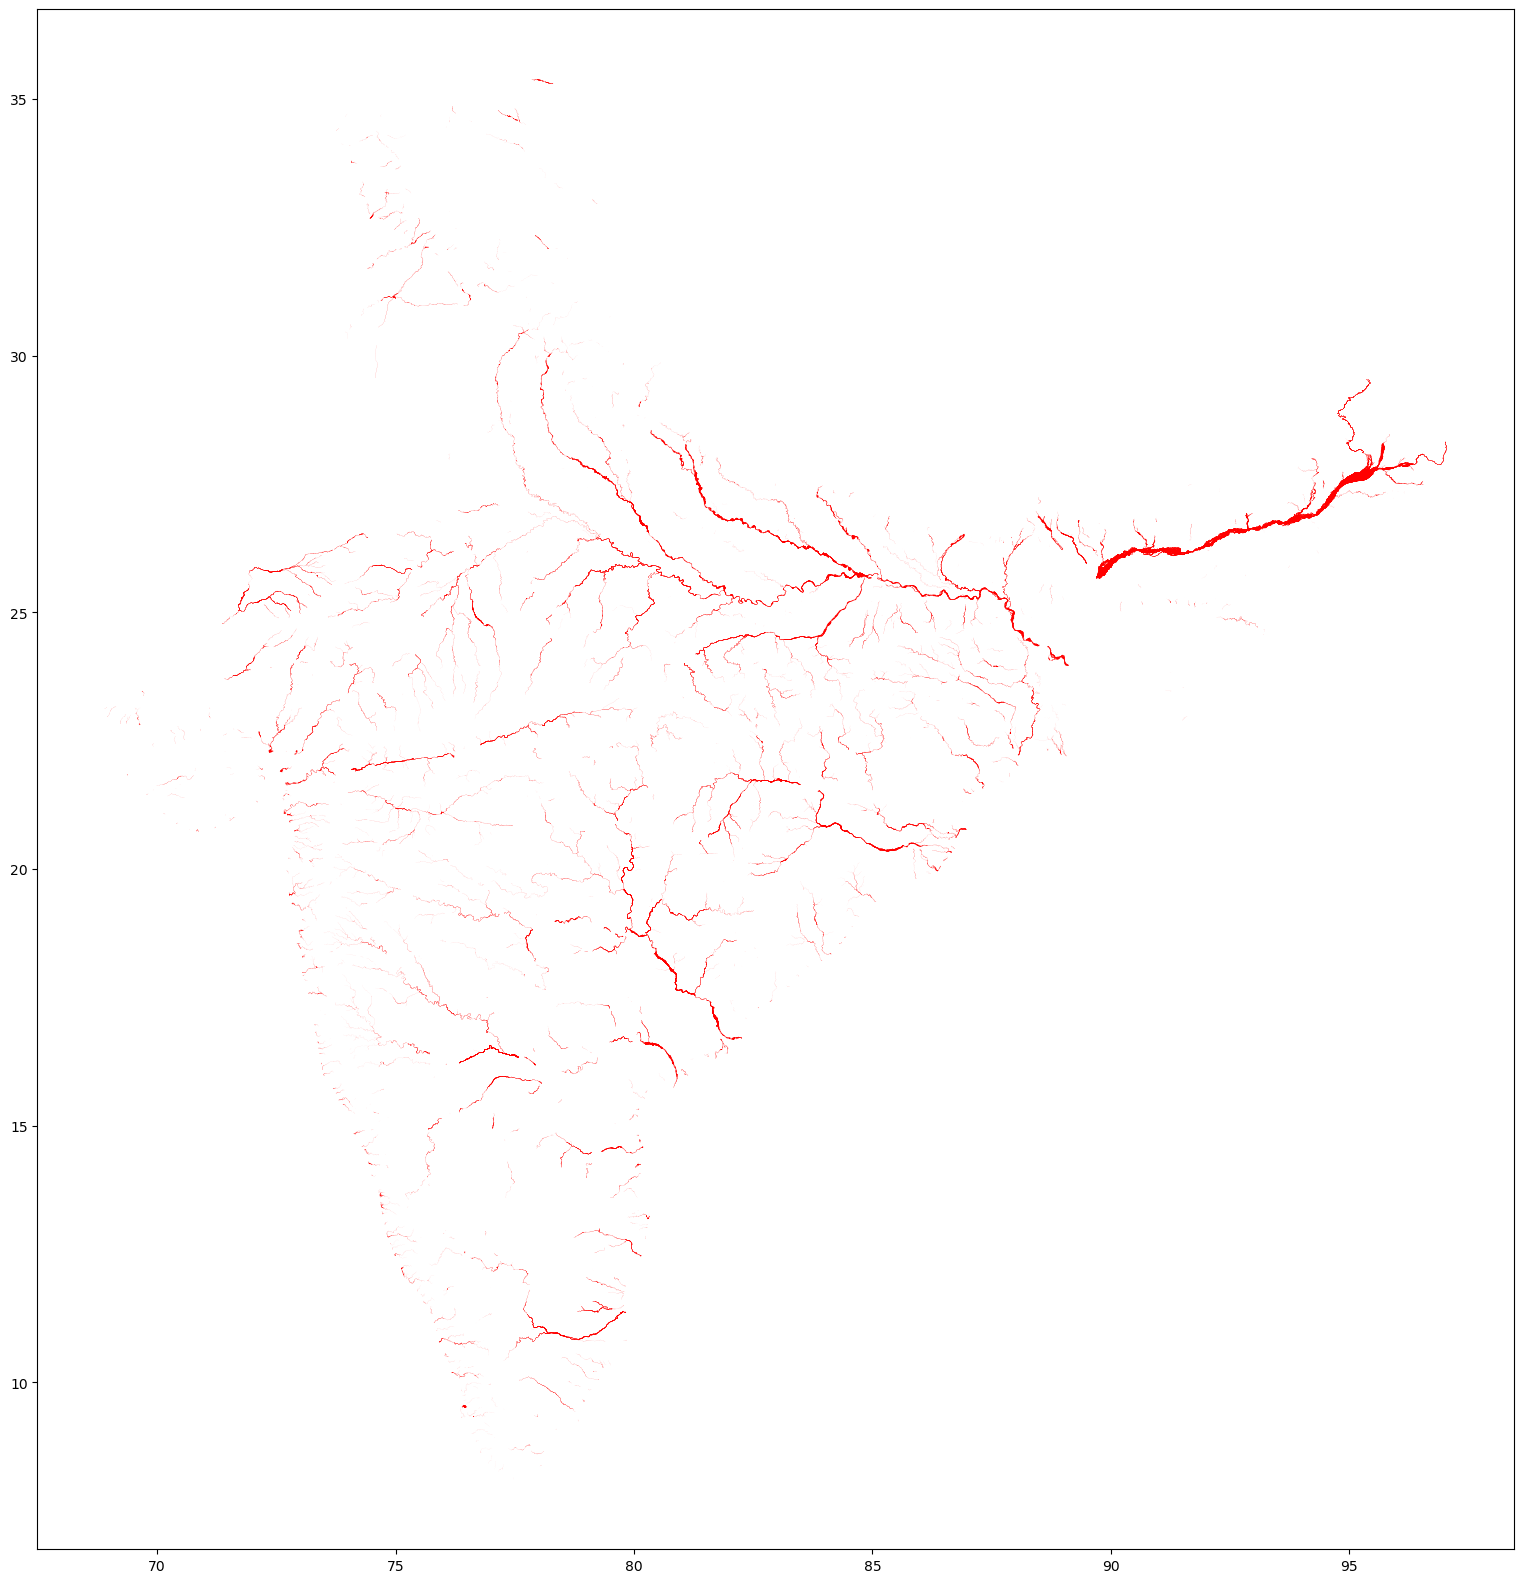

In [98]:
fig, ax =plt.subplots(figsize = (20, 20))
big_join.plot(ax = ax, color = 'red')
plt.show()

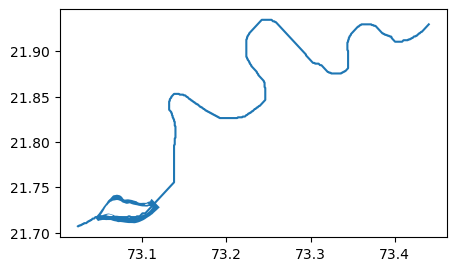

In [36]:
fig, ax =plt.subplots(figsize =(5, 5))
india_osm[:1].plot(ax =ax)
india_rivers[india_rivers['seg_id'] == 7920].plot(ax = ax)
# india_osm[:1].plot(ax = ax, facecolor = 'None', edgecolor = 'black')
plt.show()

In [100]:
with open('/data/sand_mining/rivers/segments_merged.geojson' , 'w') as file:
    file.write(big_join.to_json())